In [7]:
### Recomndation Systems

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [23]:
anime = pd.read_csv('anime.csv')
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [25]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [27]:
anime['episodes'] = pd.to_numeric(anime['episodes'], errors = 'coerce')

In [29]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  11954 non-null  float64
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 672.5+ KB


In [31]:
anime.describe()

,anime_id,episodes,rating,members
count,12294.000000,11954.000000,12064.000000,1.229400e+04
mean,14058.221653,12.382550,6.473902,1.807134e+04
std,11455.294701,46.865352,1.026746,5.482068e+04
min,1.000000,1.000000,1.670000,5.000000e+00
25%,3484.250000,1.000000,5.880000,2.250000e+02
50%,10260.500000,2.000000,6.570000,1.550000e+03
75%,24794.500000,12.000000,7.180000,9.437000e+03
max,34527.000000,1818.000000,10.000000,1.013917e+06


In [33]:
anime.shape

(12294, 7)

In [35]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes    340
rating      230
members       0
dtype: int64

In [37]:
anime['genre'] = anime['genre'].fillna('genre')
anime ['type'] = anime['type'].fillna('type')

In [39]:
anime['rating'] = anime['rating'].fillna(anime['rating'].mean())

In [41]:
anime['episodes'] = anime['episodes'].fillna(0)

In [43]:
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words = 'english')
genre_tfidf = tfidf.fit_transform(anime['genre'])
tfidf = TfidfVectorizer(stop_words='english')
type_tfidf = tfidf.fit_transform(anime["type"])


In [46]:
# COMBINATION TEXT AND NUMERICAL FEATURE

In [47]:
anime['combine_text'] = anime['genre'] + ' ' + anime['type']

In [49]:
# Normalize Numerical Feature 

In [53]:
anime['episodes'] = anime['episodes'].replace('Unknown', np.nan)
anime['episodes'] = pd.to_numeric(anime['episodes'], errors = 'coerce')
anime['episodes'] = anime['episodes'].fillna(0)

In [55]:
anime['episodes'].dtype

dtype('float64')

In [57]:
### maximum Scaling For Numerical Feature

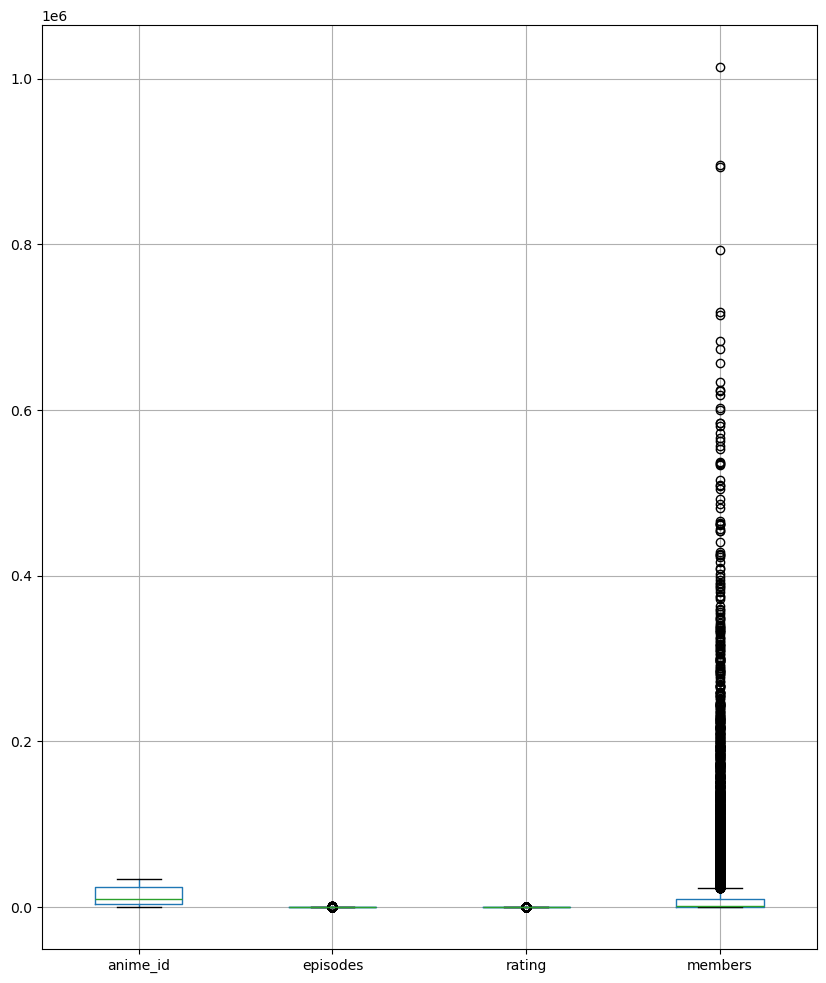

In [59]:
anime.boxplot(figsize = (10,12))
plt.show()

In [61]:
anime['members_log'] = np.log1p(anime['members'])

In [63]:
anime

,anime_id,name,genre,type,episodes,rating,members,combine_text,members_log
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,"Drama, Romance, School, Supernatural Movie",12.209223
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665,"Action, Adventure, Drama, Fantasy, Magic, Mili...",13.584418
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262,"Action, Comedy, Historical, Parody, Samurai, S...",11.646258
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572,"Sci-Fi, Thriller TV",13.420352
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266,"Action, Comedy, Historical, Parody, Samurai, S...",11.926802
...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1.0,4.15,211,Hentai OVA,5.356586
12290,5543,Under World,Hentai,OVA,1.0,4.28,183,Hentai OVA,5.214936
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4.0,4.88,219,Hentai OVA,5.393628
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1.0,4.98,175,Hentai OVA,5.170484


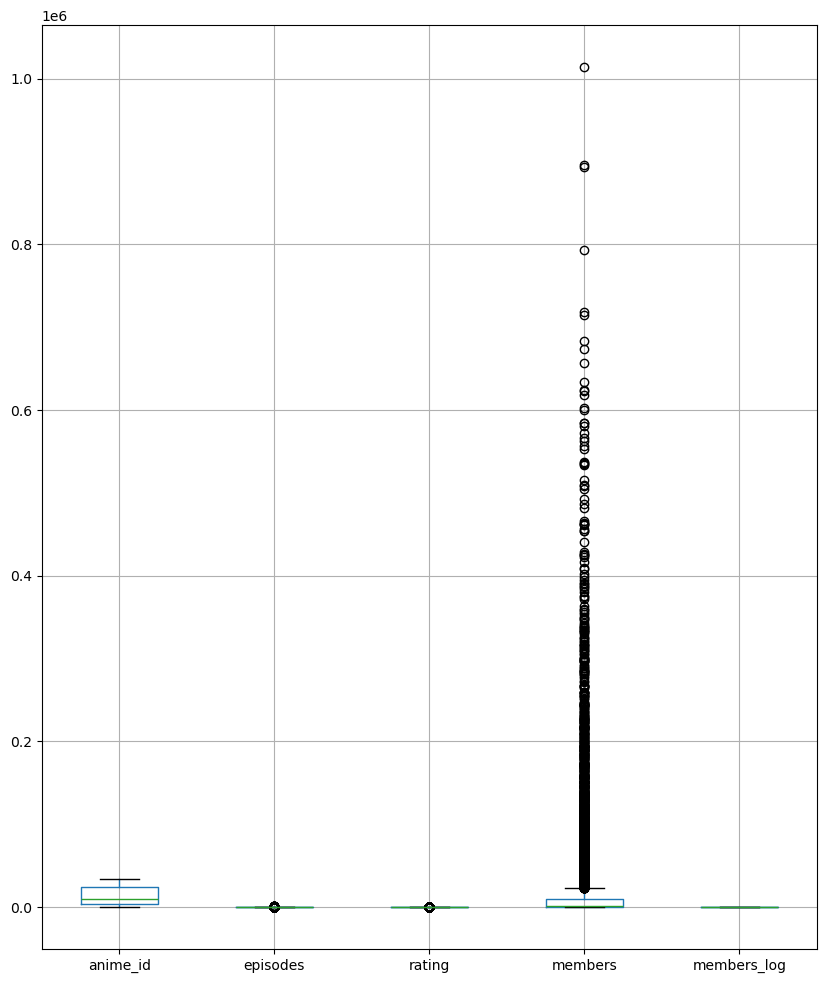

In [65]:
anime.boxplot(figsize = (10,12))
plt.show()

In [67]:
anime.drop(columns = {('members')}, axis = 1)

,anime_id,name,genre,type,episodes,rating,combine_text,members_log
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,"Drama, Romance, School, Supernatural Movie",12.209223
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,"Action, Adventure, Drama, Fantasy, Magic, Mili...",13.584418
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,"Action, Comedy, Historical, Parody, Samurai, S...",11.646258
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,"Sci-Fi, Thriller TV",13.420352
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,"Action, Comedy, Historical, Parody, Samurai, S...",11.926802
...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1.0,4.15,Hentai OVA,5.356586
12290,5543,Under World,Hentai,OVA,1.0,4.28,Hentai OVA,5.214936
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4.0,4.88,Hentai OVA,5.393628
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1.0,4.98,Hentai OVA,5.170484


In [69]:
# MINMAX SCALING FOR NUMRICAL FEATURE

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler = MinMaxScaler()
numerical_features = scaler.fit_transform(anime[['rating','episodes','members_log']])

In [75]:
from scipy.sparse import hstack

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Combine text columns into one string per row
anime['text'] = anime['name'].astype(str) + " " + anime['genre'].astype(str)

# Vectorize text features
vectorizer = TfidfVectorizer()
text_features = vectorizer.fit_transform(anime['text'])



In [87]:
print(text_features)

  (0, 5467)	0.5491588809739432
  (0, 7535)	0.2009221791102526
  (0, 7159)	0.4660307848313517
  (0, 11411)	0.3975595878287243
  (0, 2454)	0.232740592288824
  (0, 8878)	0.2613004304019911
  (0, 9231)	0.27581055122922227
  (0, 10287)	0.29034277106099515
  (1, 2454)	0.16672068245445434
  (1, 3003)	0.48608919497094827
  (1, 400)	0.48608919497094827
  (1, 1201)	0.5276120305575731
  (1, 241)	0.14754111427411992
  (1, 263)	0.15885570224131396
  (1, 2810)	0.1599069153268915
  (1, 6320)	0.2244142202705557
  (1, 6778)	0.2610545726233028
  (1, 9798)	0.17372213464454717
  (2, 241)	0.19915338028782598
  (2, 9798)	0.23449294466489673
  (2, 3351)	0.6132242101516342
  (2, 1783)	0.15955271562118423
  (2, 4063)	0.30109394370515247
  (2, 8154)	0.3560473953384201
  (2, 9118)	0.4304361776480915
  :	:
  (12289, 6233)	0.3849847949460135
  (12289, 10934)	0.4340212916432051
  (12290, 11596)	0.5701695808216504
  (12290, 11202)	0.7615132277673677
  (12290, 3936)	0.30822759941476474
  (12291, 7535)	0.1411716417814

In [89]:
final_features = hstack([text_features, numerical_features])

In [91]:
print(text_features.shape)
print(numerical_features.shape)


(12294, 12134)
(12294, 3)
